# Clustering Analysis

## K-Means

K-means is a hard clustering algorithm that assigns each data point to a single cluster, where the center of each cluster (centroid) is the mean of all the data points in the cluster.
Clustering happens through an iterative process of assigning points to the nearest centroid and then updating the centroid to the mean of the points in the cluster.

1. Randomly initialize the centroids
2. Assign each data point to the nearest centroid
3. Update the centroids to the mean of the points in the cluster
4. Repeat steps 2 and 3 until the centroids no longer change

Finding the nearest centroid is done using the Euclidean distance, which is the distance between two points in a plane.

$$
d(x, y) = \sum_{j=1}^{m}(x_j - y_j)^2 = \|x - y\|_2^2
$$

The error of clusting is done through $SSE$ (Sum of Squared Errors), which is the sum of the squared distances between each data point and its assigned centroid.
The larger the $SSE$, the larger the error of the clustering & the further examples are from the centroids. Which can indicate that we need to increase the number of clusters.

$$
SSE = \sum_{i=1}^{n} \sum_{j=1}^{m} w_{ij} \|x_{ij} - \mu_j\|_2^2

\text{where} \quad w_{ij} = \begin{cases} 1 & \text{if } x_i \text{ is assigned to cluster } j \\ 0 & \text{otherwise} \end{cases}
$$




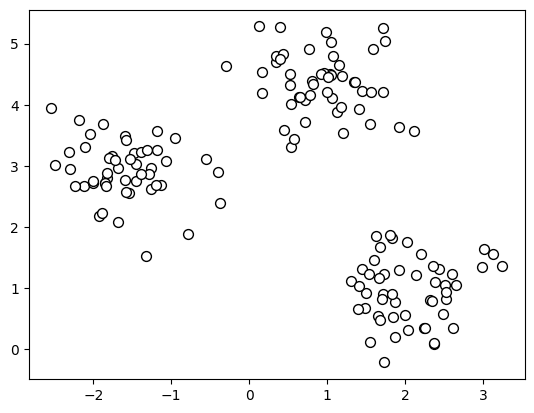

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.show()

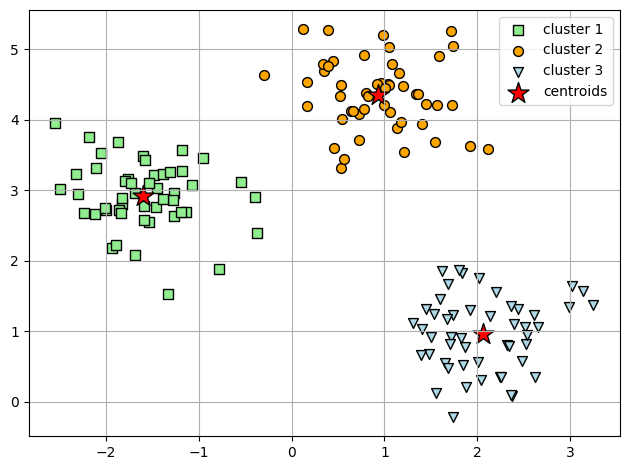

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, c='red', marker='*', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### K-Means++

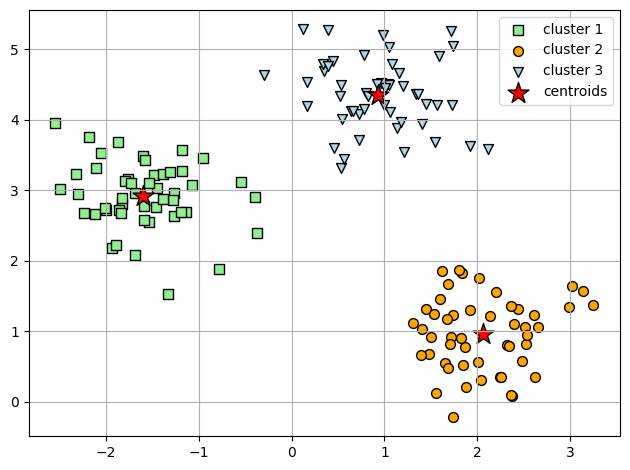

In [4]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, c='red', marker='*', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

## Soft Clustering

K-means is a hard clustering algorithm, meaning that each data point is assigned to a single cluster.
But soft or fuzzy clustering allows us to assign a data point to one or more clusters.

For example, Fuzzy C-Means (FCM) is a soft clustering algorithm that assigns a data point to multiple clusters. Each point is assigned a probability of belonging to each cluster.

The error function for FCM is given by:

$$
J_m = \sum_{i=1}^{n} \sum_{j=1}^{c} w_{ij}^m \|x_i - \mu_j\|_2^2
$$

Where $w_{ij}$ is the membership degree of data point $x_i$ to cluster $c_j$ and $m$ is a parameter that controls the fuzziness of the clustering.

The exponent $m$ is greater than 1, and the larger the value of $m$, the smaller the cluster membership $w_{ij}$ becomes, and the more fuzzy the clustering.

The cluster members probability is given by:

$$
w_{ij} = \left[\sum_{c=1}^k{\left(\frac{\|x_i - \mu_j\|}{\|x_i - \mu_c\|}\right)^{\frac{2}{m-1}}}\right]^{-1}
$$

An example if there were 3 clusters, would look like:

$$
w_{ij} = \left[\left(\frac{\|x_i - \mu_j\|}{\|x_i - \mu_1\|}\right)^{\frac{2}{m-1}} + \left(\frac{\|x_i - \mu_j\|}{\|x_i - \mu_2\|}\right)^{\frac{2}{m-1}} + \left(\frac{\|x_i - \mu_j\|}{\|x_i - \mu_3\|}\right)^{\frac{2}{m-1}}\right]^{-1}
$$

To center $\mu_j$ for each cluster, we need to solve the following equation,
which is calculated as the mean of all examples weighted by the degree to which each example belongs to that cluster:

$$
\mu_j = \frac{\sum_{i=1}^{n} w_{ij}^m x_i}{\sum_{i=1}^{n} w_{ij}^m}
$$

# Evaluation

## Elbow Method

The elbow method is a technique used to determine the optimal number of clusters for a given dataset.
It works by plotting the SSE for different numbers of clusters and then looking for the "elbow" in the plot.
The elbow is the point where the SSE starts to level off, indicating that the number of clusters is optimal.

In [6]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


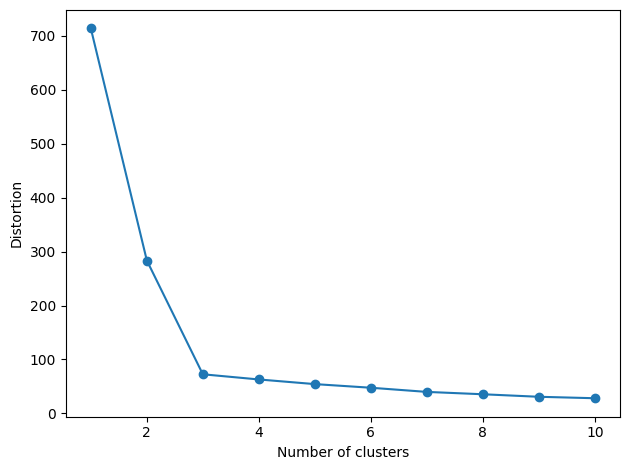

In [7]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## Silhouette Analysis

The silhouette analysis is a technique used to evaluate the quality of a clustering result.
It works by plotting the silhouette score for different numbers of clusters and then looking for the "elbow" in the plot.
The silhouette score is a measure of how similar a data point is to its own cluster compared to other clusters.

Often times, good clustering results will have a silhouette score between 0.5 and 0.7. Often having similar widths and heights.

Bad clustering results will have a silhouette score close to 0 and usually there will be large differences in widths and heights between the clusters silhouettes.

$$
s^{(i)} = \frac{b^{(i)} - a^{(i)}}{\max\{a^{(i)}, b^{(i)}\}}
$$

Where:

- $a^{(i)}$ is the average distance to all other points in the same cluster (intra-cluster distance/cluster cohesion)
- $b^{(i)}$ is the average distance to all other points in the nearest cluster (inter-cluster distance/cluster separation)

A high cluster cohesion score will usually mean that $s^{(i)}$ will be negative, meaning that the example $x^{(i)}$ is not very cohesive with its own cluster.

Thus, a higher cluster separation will usually denote the opposite, meaning better clustering results.

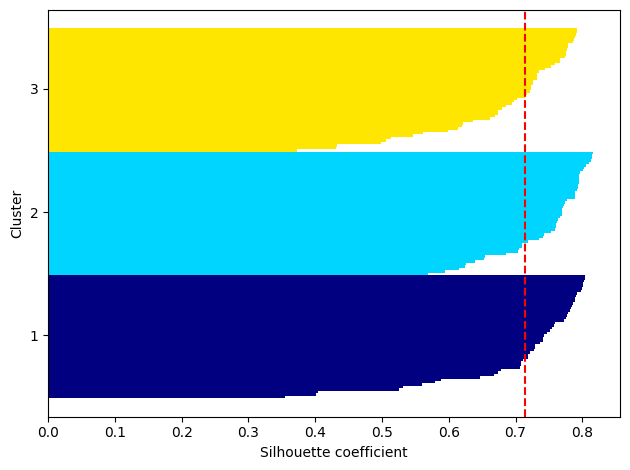

In [8]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

### Bad Clustering

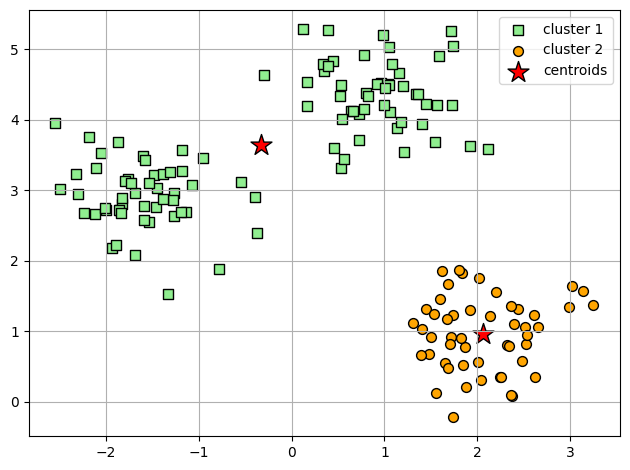

In [10]:
km = KMeans(n_clusters=2,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0)

y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, c='red', marker='*', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()

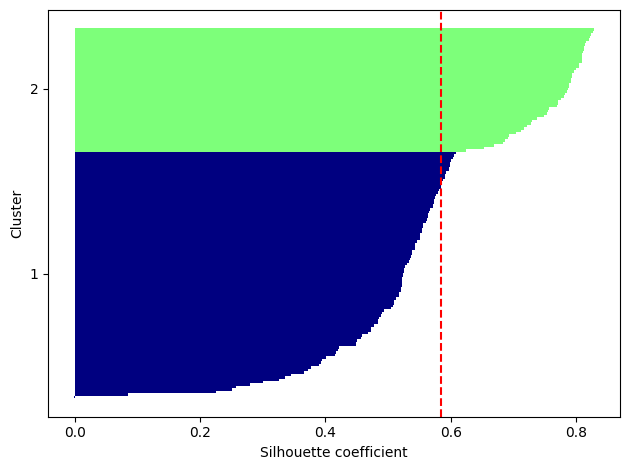

In [11]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

# DBSCAN

DBSCAN is a density-based clustering algorithm that groups together points that are close to each other.
It works by identifying high-density regions and treating them as clusters.

The algorithm works by:

1. Identify all points that are within a distance $\epsilon$ of each other (core points)
2. Group all core points that are within a distance $\epsilon$ of each other into a cluster
3. Any remaining points that are not core points are considered noise or outliers

Points can be assigned 3 different labels:

- Core point: A point that has more than $MinPts$ points within a distance $\epsilon$ of it
- Border point: A point that has fewer than $MinPts$ points within a distance $\epsilon$ of it, but is within a distance $\epsilon$ of a core point
- Noise point: A point that is more than a distance $\epsilon$ from any core point

The parameters for DBSCAN are:

- $\epsilon$: The maximum distance between two points to be considered in the same cluster
- $MinPts$: The minimum number of points to form a dense region

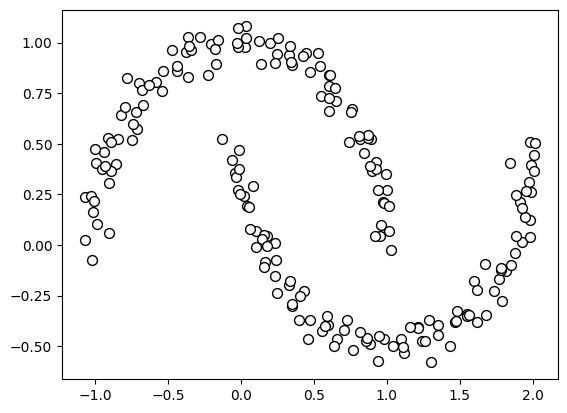

In [12]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.show()

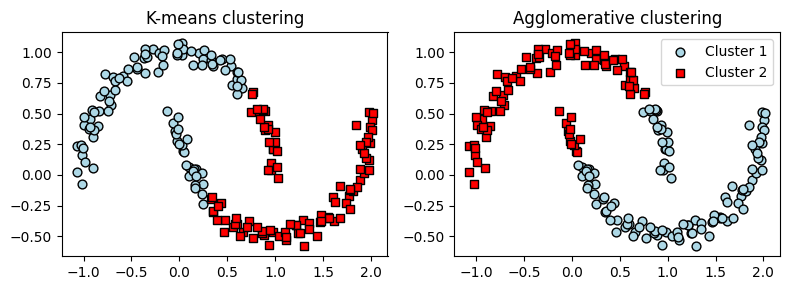

In [15]:
from sklearn.cluster import AgglomerativeClustering

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2,
    random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1], c='red', edgecolor='black', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0],
  X[y_ac == 0, 1],
  c='lightblue',
  edgecolor='black',
  marker='o',
  s=40,
  label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0],
  X[y_ac == 1, 1],
  c='red',
  edgecolor='black',
  marker='s',
  s=40,
  label='Cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.tight_layout()
plt.show()

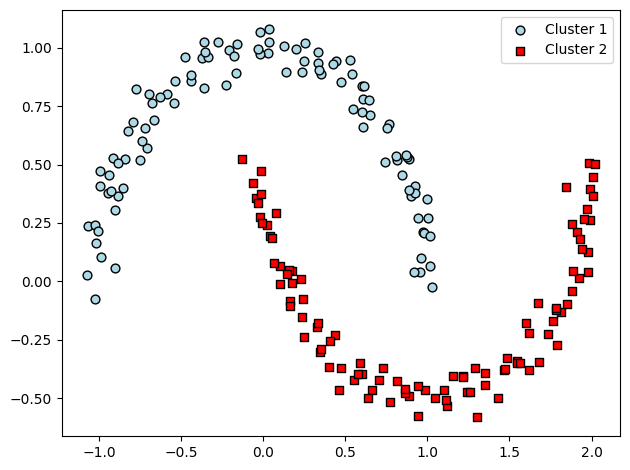

In [16]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,
  min_samples=5,
  metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0],
  X[y_db == 0, 1],
  c='lightblue',
  edgecolor='black',
  marker='o',
  s=40,
  label='Cluster 1')
plt.scatter(X[y_db == 1, 0],
  X[y_db == 1, 1],
  c='red',
  edgecolor='black',
  marker='s',
  s=40,
  label='Cluster 2')
plt.legend()
plt.tight_layout()
plt.show()